<a id="top"></a>
# **8.3 Reinforced beam - how to define a parametric study**

In [8]:
%matplotlib widget
import numpy as np
from bmcs_cross_section.api import MKappa, ReinfLayer, MKappaParamsStudy
from bmcs_beam.api import DeflectionProfile, LoadDeflectionParamsStudy

# **Moment-curvature (cross-section level)**

 - Define the `MKappa` instance with the low and high bound of the curvature `kappa`
 - Assemble the cross section with a `ReinfLayer` at the position `z` with the cross-sectional area `A`, and select the material model `matmod`
 - Render the interactive interface to verify the input date of the model using the method `interact`
 - Inspect the plotted moment curvature relation, and profile of stress along the cross-sectional height

In [3]:
mc = MKappa(low_kappa = 0, high_kappa = 0.00006)

bl1 = ReinfLayer(z=20, A=6 * np.pi * 8 **2, matmod='steel')
bl1.matmod_.trait_set(E=200000, f_sy=400)
mc.cross_section_layout.add_layer(bl1)

mc.interact()

# **Load-deflection curve (beam level)**

Use the defined moment-curvature model `mc` as an input of the `DeflectionProfile` model and render its interactive interface using the method `interact`

In [4]:
dp = DeflectionProfile(mc = mc)
dp.interact()

# **Example studies of load-deflection response**

Use the preconfigured models to inspect the response for provided options. Notice the direct correspondence between the options provided in the script and the model parameters visible and editable via the interactive interface.

In [5]:
mc = MKappa(low_kappa = 0, high_kappa = 0.00006)

bl1 = ReinfLayer(z=20, A=6*np.pi*8**2, matmod='steel')
bl1.matmod_.trait_set(E=200000, f_sy=400)
mc.cross_section_layout.add_layer(bl1)

bl2 = ReinfLayer(z=40, A=2*np.pi*8**2, matmod='carbon')
bl2.matmod_.trait_set(E=160000, f_t=1890)
mc.cross_section_layout.add_layer(bl2)

mc.cs_design.matrix= 'EC2'
# mc.cs_design.matrix= 'EC2 with plateau'
# mc.cs_design.matrix_.trait_set(f_cm = 30, factor=1)

dp = DeflectionProfile(mc = mc)
dp.beam_design.system_.L = 3000

# dp.beam_design.system = 'simple_beam_dist_load'
# dp.beam_design.system = 'cantilever_dist_load'
dp.beam_design.system = '3pb'

dp.interact()

# **Parametric study**

Use a `ParamStudy` class to run a set of simulations and plot the results

## 1. MKappa

Parametric study is running...
B: (100), (200), (300), 
H: (300), (400), (500), 
Parametric study finished.


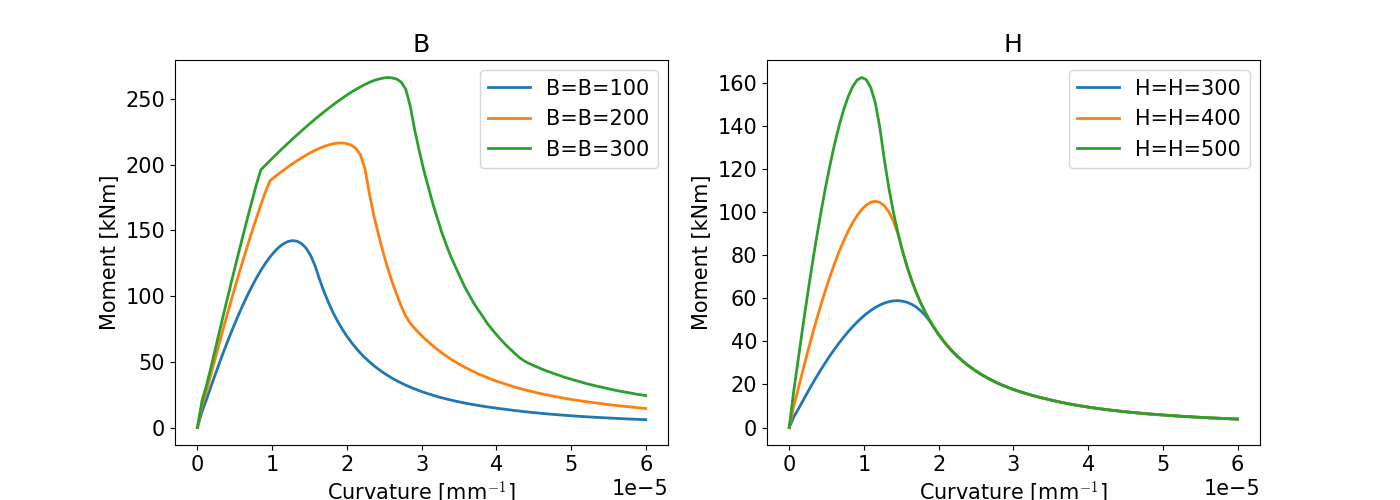

In [18]:
ps = MKappaParamsStudy(dp.mc)
params_config = [
        ['B',      dp.mc.cross_section_shape_, [100, 200, 300]],
        ['H',      dp.mc.cross_section_shape_, [300, 400, 500]],
]
ps.run(params_config)
pass

## 2. LoadDeflection

Parametric study is running...
L: (3000), (5000), (6000), 
Parametric study finished.


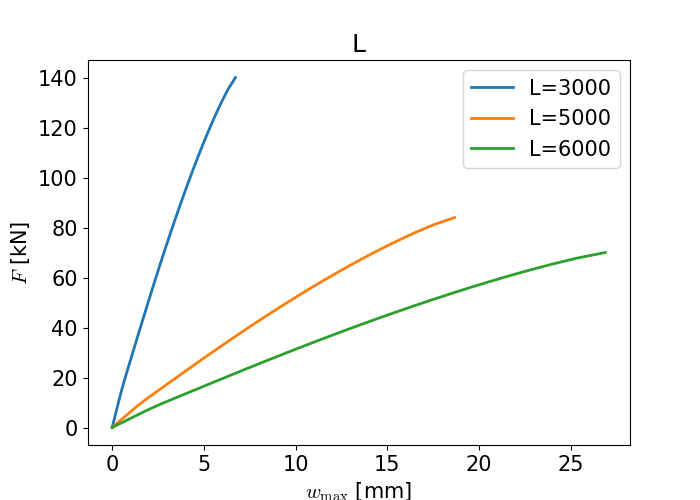

In [20]:
ps = LoadDeflectionParamsStudy(dp)
params_config = [
        ['L', dp.beam_design.system_, [3000, 5000, 6000]],
]
ps.run(params_config)
pass